# Wichtige Funktionen in Python

Python bietet eine Vielzahl von Funktionen, die das Programmieren erleichtern. Hier sind einige der wichtigsten Funktionen:

# Variablen

In [1]:
a = 1.1
type(a)

float

In [2]:
b = '1.1'
type(b)

str

## Umformungen

In [3]:
a = int(1.1)
print(a)

1


In [4]:
float(a)

1.0

In [5]:
str(a)

'1'

# Funktionen

In [6]:
def square():
    return 2*2

In [7]:
square()

4

In [8]:
def square(x):
    return x**2

In [9]:
square(23)

529

# If-Anweisungen

In [10]:
zahl = 10
if zahl > 0:
    print("Die Zahl ist positiv.")
else:
    print("Die Zahl ist nicht positiv.")

Die Zahl ist positiv.


# Beispiel: Datenimport, Datenqualitätsprüfung und Workflow

## Einführung

Die Überprüfung der Datenqualität ist ein unvermeidlicher und entscheidender Schritt in jeder Analyse. Häufig werden Daten verwendet, die extern erhoben wurden, oder aus vielen verschiedenen Quellen stammen. In diesem Kurs arbeiten wir mit Wasserstands- und Durchflussdaten, die vom Water Survey of Canada (WSC) und anderen Quellen gesammelt wurden. **In der Berufspraxis die Verantwortung der Datenqualitätsprüfung allein bei dem/der Ingenieur:in. Die Daten sind oft wichtige Grundlage für Entwurfsplanung oder die Entscheidungsfindung.** Datensätze aus offenen Quellen werden oft von einem Haftungsausschluss begleitet, siehe [WSC-Haftungsausschluss] (https://wateroffice.ec.gc.ca/disclaimer_info_e.html) zum Beispiel.

Da die größe der Datensätze fast überall kontinuierlich wächst, wird es immer wichtiger, automatisierte Ansätze zur Datenüberprüfung zu verwenden. Dieses Notebook bietet eine (wenn auch sehr kurze) Einführung in das programmgesteuerte Importieren und Überprüfen von Datensätzen. Es wird eine eine beispielhafte „CSV“-Datei von einem Messgerät importiert, das häufig in der hydrologischen Praxis verwendet wird. Die Größe des Datensatzes, den man manuell auf Anomalien überprüfen kann, ist allerdings begrenzt.

Beim lernen der Programmiersprache Python, gibt es ein paar triviale Aufgaben, die eventuell unnötig komplex erscheinen. Das Importieren von Daten ist eine solches Beispiel. Während man sonst auf eine einzelne Excel Datei klickt, um sie zu öffnen, und *meistens* das Programm bereits weiß, ob eine Zelle beispielsweise eine Zahl oder einen Text enthält, *muss* man in Python den Datentyp, mit dem gearbeietet wird deklarieren. Das folgende Beispiel zeigt ein häufiges Datenimportproblem und wie man damit umgeht.

>**Hinweis**: Das unten häufig verwendete „#“-Symbol wird zum Hinzufügen von Kommentaren verwendet. Diese dienen dazu Informationen an andere Personen zu übermitteln, die den Code überprüfen oder verwenden sollen. Der Python-Interpreter ignoriert alle Zeilen, die mit „#“ beginnen.

### Was zum Teufel hat das mit Hydrologie zu tun?

Die in das Erlernen der Grundlagen der Tools investierte Zeit erspart später eventuell viele Stunden Frustration. Diese Stunden können so in die Erforschung und Prüfung hydrologischer Konzepte anhand von Beobachtungsdaten investiert werden. **Grundsätzlich gilt: Eine Automatisierung der Dateiverwaltung ermöglicht das Erstellen leistungsstarker Tools.**

In [11]:
# Bibliotheken importieren
# --> Bibliotheken sind Sammlungen von Funktionen, die von 
# Open-Source-Softwareentwicklern entwickelt wurden und sich typischerweise auf die Lösung sehr spezifischer Probleme konzentrieren.

# numpy ist eine grundlegende Bibliothek für wissenschaftliches Rechnen
# basiert auf der Darstellung von Daten als Arrays
import numpy as np

# pandas ist eine Bibliothek, die "dataframes", tabellenartige Strukturen, manipuliert,
# um effizient Operationen auf großen Datensätzen auszuführen
import pandas as pd

# matplotlib ist eine Bibliothek zum Plotten
from matplotlib import pyplot as plt

# Numpy-Bibliothek für grundlegende Matrix Operationen

In [12]:
np.__version__

'1.24.3'

In [13]:
np.zeros(3)

array([0., 0., 0.])

In [14]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [15]:
k = np.arange(0,10,1)
k

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
k.astype(float)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [17]:
k = np.arange(-10,1,1)
np.abs(k)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

## shape

In [18]:
k = np.ones((2,5,9))

In [19]:
k.shape

(2, 5, 9)

In [20]:
k.reshape(-1).shape

(90,)

In [21]:
np.array([1,2,3]).reshape(-1,1).shape

(3, 1)

In [22]:
k.reshape(5,2,9).shape

(5, 2, 9)

In [23]:
k.transpose(2,1,0).shape

(9, 5, 2)

# Pandas-Bibliothek zur Datenverwaltung

In [24]:
pd.__version__

'2.0.1'

In [25]:
pd.DataFrame(np.ones((2,3)))

,0,1,2
0,1.0,1.0,1.0
1,1.0,1.0,1.0


In [26]:
df_ = pd.DataFrame(np.ones((48,3)),
                   columns=['sensor1','sensor2','sensor3'],
                   index=pd.date_range('2021',freq='H',periods=48))
df_

,sensor1,sensor2,sensor3
2021-01-01 00:00:00,1.0,1.0,1.0
2021-01-01 01:00:00,1.0,1.0,1.0
2021-01-01 02:00:00,1.0,1.0,1.0
2021-01-01 03:00:00,1.0,1.0,1.0
2021-01-01 04:00:00,1.0,1.0,1.0
2021-01-01 05:00:00,1.0,1.0,1.0
2021-01-01 06:00:00,1.0,1.0,1.0
2021-01-01 07:00:00,1.0,1.0,1.0
2021-01-01 08:00:00,1.0,1.0,1.0
2021-01-01 09:00:00,1.0,1.0,1.0


In [27]:
df_.index

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               '2021-01-01 10:00:00', '2021-01-01 11:00:00',
               '2021-01-01 12:00:00', '2021-01-01 13:00:00',
               '2021-01-01 14:00:00', '2021-01-01 15:00:00',
               '2021-01-01 16:00:00', '2021-01-01 17:00:00',
               '2021-01-01 18:00:00', '2021-01-01 19:00:00',
               '2021-01-01 20:00:00', '2021-01-01 21:00:00',
               '2021-01-01 22:00:00', '2021-01-01 23:00:00',
               '2021-01-02 00:00:00', '2021-01-02 01:00:00',
               '2021-01-02 02:00:00', '2021-01-02 03:00:00',
               '2021-01-02 04:00:00', '2021-01-02 05:00:00',
               '2021-01-02 06:00:00', '2021-01-02 07:00:00',
               '2021-01-

In [28]:
df_.dtypes

sensor1    float64
sensor2    float64
sensor3    float64
dtype: object

In [29]:
df_['sensor1']

2021-01-01 00:00:00    1.0
2021-01-01 01:00:00    1.0
2021-01-01 02:00:00    1.0
2021-01-01 03:00:00    1.0
2021-01-01 04:00:00    1.0
2021-01-01 05:00:00    1.0
2021-01-01 06:00:00    1.0
2021-01-01 07:00:00    1.0
2021-01-01 08:00:00    1.0
2021-01-01 09:00:00    1.0
2021-01-01 10:00:00    1.0
2021-01-01 11:00:00    1.0
2021-01-01 12:00:00    1.0
2021-01-01 13:00:00    1.0
2021-01-01 14:00:00    1.0
2021-01-01 15:00:00    1.0
2021-01-01 16:00:00    1.0
2021-01-01 17:00:00    1.0
2021-01-01 18:00:00    1.0
2021-01-01 19:00:00    1.0
2021-01-01 20:00:00    1.0
2021-01-01 21:00:00    1.0
2021-01-01 22:00:00    1.0
2021-01-01 23:00:00    1.0
2021-01-02 00:00:00    1.0
2021-01-02 01:00:00    1.0
2021-01-02 02:00:00    1.0
2021-01-02 03:00:00    1.0
2021-01-02 04:00:00    1.0
2021-01-02 05:00:00    1.0
2021-01-02 06:00:00    1.0
2021-01-02 07:00:00    1.0
2021-01-02 08:00:00    1.0
2021-01-02 09:00:00    1.0
2021-01-02 10:00:00    1.0
2021-01-02 11:00:00    1.0
2021-01-02 12:00:00    1.0
2

In [30]:
df_.values

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1

In [31]:
df_.resample('D').mean()

,sensor1,sensor2,sensor3
2021-01-01,1.0,1.0,1.0
2021-01-02,1.0,1.0,1.0


In [32]:
df_.resample('MIN').interpolate(method='linear')

,sensor1,sensor2,sensor3
2021-01-01 00:00:00,1.0,1.0,1.0
2021-01-01 00:01:00,1.0,1.0,1.0
2021-01-01 00:02:00,1.0,1.0,1.0
2021-01-01 00:03:00,1.0,1.0,1.0
2021-01-01 00:04:00,1.0,1.0,1.0
...,...,...,...
2021-01-02 22:56:00,1.0,1.0,1.0
2021-01-02 22:57:00,1.0,1.0,1.0
2021-01-02 22:58:00,1.0,1.0,1.0
2021-01-02 22:59:00,1.0,1.0,1.0


In [33]:
data_part = df_[['sensor1','sensor2']]
data_part

,sensor1,sensor2
2021-01-01 00:00:00,1.0,1.0
2021-01-01 01:00:00,1.0,1.0
2021-01-01 02:00:00,1.0,1.0
2021-01-01 03:00:00,1.0,1.0
2021-01-01 04:00:00,1.0,1.0
2021-01-01 05:00:00,1.0,1.0
2021-01-01 06:00:00,1.0,1.0
2021-01-01 07:00:00,1.0,1.0
2021-01-01 08:00:00,1.0,1.0
2021-01-01 09:00:00,1.0,1.0


## Dateipfad

**Ein grundlegendes, aber enorm wichtiges Konzept besteht darin, zu verstehen, wie man eine Datei einliest, die irgendwo im Dateisystem des Computers gespeichert ist** WICHTIG: Häufig ist dies auch auf einem anderen Computer, beispielsweise einem in einem Netzwerk oder einem offenen Datenrepository. 

In modernen Betriebssystemen wie Windows und macOS wird meist einfach auf eine Datei geklickt und das entsprechende Programm startet und öffnet die Datei inklusive der Benutzeroberfläche. In Programmiersprachen geht es in die entgegengesetzte Richtung – Es muss explizit angegeben werden, wo sich eine Datei auf der Festplatte befindet. Es ist wichtig zu verstehen, dass Jupyter-Notebooks Dateipfade **relativ zum Speicherort der Notebook-Datei interpretieren.**

Die Notebook-Datei, die in dieser Demonstration verwendet wird, trägt die Bezeichnung "Einleitung_Datenimport.ipynb" und ist unter "<something>/Wassermengenwirtschaft_und_Klimawandel/Inhalt/Notebooks/Einleitung/Einleitung_Datenimport.ipynb", wobei "<something>" der Dateipfad ist, in dem die Archivdatei (Zip) gespeichert und entpackt wurde.

### Laden Sie die Projektdatendatei herunter

Es wird zunächst das Code-Repository von GitHub heruntergeladen. Dies kann über den folgenden Link geschehen:
https://github.com/gjohnen1/Wassermengenwirtschaft_und_Klimawandel

Über die grüne Schaltfläche „Code“ kann die ZIP-Datei des Code-Repositorys heruntergeladen werden, wie unten gezeigt:

![Github-Downloadseite](img/zip_download.png)

Auf den meisten Systemen wird die Datei standardmäßig im Ordner „Downloads/“ abgelegt. **Die Datei kann nach dem entpacken an einen beliebigen Ort verschoben werden (Sciebo ist auch möglich)**. Dieser Ordner wird als **Projektstammverzeichnis** bezeichnet.

### Dateistruktur

Auf der Ebene des Stammverzeichnisses sieht die Struktur ungefähr wie folgt aus:

```
\OneDrive - Universitaet Duisburg-Essen\GitHub\repos\Wassermengenwirtschaft_und_Klimawandel
│ README.md
│ requirements.txt <-- 
│
└───Inhalt
│ │ config.yml
│ │ Einleitung.md
│ │ markdown.md
│ │ _toc.yml
│ │
│ └───_build
│ │ ...
│ │
│ └───img
│ │ ...
│ │
│ └───Notebook_Daten
│ │ ...
│ │
│ └───Notebooks
| │ └───Einführung <-- Dies ist der Speicherort von Einleitung_Datenimport.ipynb
│ │ └───Notebook_1
│ │ └───...
│ │
│ └───Projekt_Daten <-- Dies ist der Speicherort der Daten, die für das Projekt verwendet werden
│ │ ...
│ │
```

Am Ende der Dateistruktur befindet sich ein Ordner namens "Projekt_Daten", der eine Reihe von CSV-Dateien enthält, die für die Hausarbeit verwendet werden. Es wird nun versucht die Datei "Hidden_Creek_stage_data.csv" zu öffnen.

## Eine CSV-Datei einlesen

Wenn eine Datendatei (nennen wir sie *data.csv*) aus diesem Notebook heraus geöffnet werden soll, kann diese einfach im selben Ordner wie diese Notebook-Datei gespeichert werden. Die CSV-Datei dann mit Pandas gelesen werden, indem wir einfach den Dateinamen verwenden:

`df = pd.read_csv('data.csv')`

>**Hinweis**: Oben wird die Funktion „read_csv“ aus der Pandas-Bibliothek mit der Kurzform „pd“ aufgerufen. Der Dateipfad lautet in diesem Fall einfach „data.csv“. Zu beachten ist, dass es sich um eine Zeichenfolge handeln muss, d. h. in 'einfache Anführungszeichen' oder "doppelte Anführungszeichen" eingeschlossen, beides ist in Ordnung.

In den meisten Fällen sollen Daten jedoch so organisiert sein, dass diese beispielsweise in einem extra "Daten-Ordner" liegen sind anstatt in dem Ordner der Code Datei bzw. des Jupyter-Notebooks. Wenn die Datei woanders gespeichert ist, gibt es mehrere Möglichkeiten, ihren Speicherort anzugeben. Als Nächstes soll die csv-Datei "Hidden_Creek_stage_data.csv" eingelesen werden.

Wenn versucht wird, diese Datei nur mit dem Dateinamen zu öffnen, sucht die Jupyter-Schnittstelle auf der Stammebene des Projekts nach einer Datei mit diesem Namen, **wird sie jedoch nicht finden**.

Die Fehlermeldung wird in etwa wie folgt lauten:

```
FileNotFoundError                         Traceback (most recent call last)
<ipython-input-5-b872b6bb0ac8> in <module>
      3 # in this case  is located in the
      4 # Open the folder and navigate to where
----> 5 df = pd.read_csv('Hidden_Creek_stage_data.csv')
```

In [34]:
data = pd.read_csv('Hidden_Creek_stage_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Hidden_Creek_stage_data.csv'

Dieser Fehler tritt auf, weil dem Interpreter mitgeteilt wurde, dass sich die Datei auf der Ebene des Projektstamms befindet, sie aber nicht dort abgespeichert ist.

In [35]:
# Importieren Sie zunächst die Funktionsbibliothek „Betriebssystem“.
import os

#Speichern Sie den aktuellen Arbeitsverzeichnispfad als Zeichenfolge
working_directory = os.getcwd()
# zeigt den aktuellen Pfad an
working_directory

'C:\\Users\\GJ\\OneDrive - Universitaet Duisburg-Essen\\GitHub\\repos\\Wassermengenwirtschaft_und_Klimawandel\\Inhalt\\Notebooks\\Einleitung'

>**Hinweis**: Wenn die letzte Zeile eines Codeblocks nur eine Variable ist, gibt der Interpreter die Variable aus. Wenn Sie etwas drucken möchten, das nicht die letzte Codezeile in einem Block ist, müssen Sie eine `print(...)`-Funktion verwenden, also `print(working_directory)`.

Oben wurde das aktuelle Arbeitsverzeichnis in einer Variablen namens `working_directory` gespeichert. Diese Variable kann verwendet werden, um den Inhalt des Verzeichnisses mit der Funktion `listdir()` aus der Bibliothek "os" aufzulisten, um den Inhalt des Verzeichnisses aufzulisten. Für das aktuelle Verzeichnis sieht das wie folgt aus:

In [36]:
os.listdir(working_directory)

['.ipynb_checkpoints', 'Einführung_Datenimport.ipynb', 'img']

Hier ist zu sehen, dass sich im aktuellen Arbeitsverzeichnis keine `.csv`-Dateien befinden. Das liegt daran, dass die Projektdaten unter `\Wassermengenwirtschaft_und_Klimawandel\Inhalt\Projekt_Daten\` gespeichert werden.

### Alternative Möglichkeiten zum Angeben eines Dateipfads

Es wird die Datei mit den enthaltenen Wasserständen (`Hidden_Creek_stage_data.csv`) aus dem Verzeichnis `Projekt_Daten`

1. Hier wird der vollständige Dateipfad verwendet, um die Datei zu lesen. Meins ist:
`c:\Users\GJ\OneDrive - Universitaet Duisburg-Essen\GitHub\repos\Wassermengenwirtschaft_und_Klimawandel\Inhalt\Projekt_Daten\Hidden_Creek_stage_data.csv`

Es wird nun folgendes probiert: (aktualisiert die Zeichenfolge unten auf den richtigen Pfad):

In [37]:
# note, here you need to replace "somewhere" with the rest of your filepath as described above
data_path = '<somewhere>/Wassermengenwirtschaft_und_Klimawandel/Inhalt/Projekt_Daten/Hidden_Creek_stage_data.csv'

In [38]:
# data = pd.read_csv(data_path)
# data

2. Alternativ kann vom Speicherort dieser Notebook-Datei (dem „aktuellen Arbeitsverzeichnis“) zur Datendatei navigieren. Man spricht dann von einem **relativen Pfad**. Die Pandas-Funktion `read_csv('<filepath>')` liest (`../`) im Dateipfad so, dass sie vom aktuellen Verzeichnis aus „eine Ebene nach oben“ geht. Basierend auf der Dateistruktur wie [oben beschrieben](#File-Structure)  ist zu sehen, dass der Ordner `project_data/` **zwei Ebenen höher** vom aktuellen Arbeitsverzeichnis liegt. 

Dies lässt sich anhand der Funktion „listdir“ gut erklären.

In [39]:
os.listdir('../')

['.ipynb_checkpoints', 'Einleitung', 'Notebook_1']

In [40]:
os.listdir('../../')

['Einleitung.md',
 'img',
 'markdown.md',
 'Notebooks',
 'Notebook_Daten',
 'Projekt_Daten',
 '_build',
 '_config.yml',
 '_toc.yml']

Oben wird der Ordner `Projekt_Daten/` nun gelistet. Der Inhalt des Ordners lässt sich wie folgt auflisten:

In [41]:
os.listdir('../../Projekt_Daten')

['Hidden_Creek_stage_data.csv',
 'measured_EC_data_A.csv',
 'measured_EC_data_B.csv',
 'measured_EC_data_C.csv',
 'measurement_calibration_A.csv',
 'measurement_calibration_B.csv',
 'measurement_calibration_C.csv',
 'Metadata_A.txt',
 'Metadata_B.txt',
 'Metadata_C.txt',
 'Project_QH_table_2021.csv',
 'regionaler_Abfluss']

Den Pfad kann man als Variable abspeichern und ihn bspw. `HC_data_path` nennen:

In [42]:
data_folder = '../../Projekt_Daten/'
HC_data_path = data_folder + 'Hidden_Creek_stage_data.csv'
# Alternativ man auch die Funktion os.path.join() verwenden, um den Pfad zu erstellen, d. h.
# HC_data_path = os.path.join(data_folder, 'Hidden_Creek_stage_data.csv')
pd.read_csv(HC_data_path)

,ID,PARAM,Date,year,month,day,Value
0,00XX000,2,2010/08/25,2010,8,25,0.83
1,00XX000,2,2010/08/26,2010,8,26,0.876
2,00XX000,2,2010/08/27,2010,8,27,1.16
3,00XX000,2,2010/08/28,2010,8,28,0.867
4,00XX000,2,2010/08/29,2010,8,29,0.711
...,...,...,...,...,...,...,...
672,00XX000,2,2012/06/27,2012,6,27,1.95
673,00XX000,2,2012/06/28,2012,6,28,2
674,00XX000,2,2012/06/29,2012,6,29,2.38
675,00XX000,2,2012/06/30,2012,6,30,2.71


3. Die Syntax `../` funktioniert in Jupyter und mit Pandas, aber nicht immer. Eine solide Möglichkeit, „eine Ebene nach oben“ zu navigieren, ist die Funktion `os.dirname()` , um den Namen des übergeordneten Verzeichnisses aus dem aktuellen Arbeitsverzeichnis abzurufen.

Erinnerung: `os.getcwd()` ruft das aktuelle Arbeitsverzeichnis ab.

In [43]:
parent_dir = os.path.dirname(os.getcwd())
parent_dir

'C:\\Users\\GJ\\OneDrive - Universitaet Duisburg-Essen\\GitHub\\repos\\Wassermengenwirtschaft_und_Klimawandel\\Inhalt\\Notebooks'

In [44]:
os.listdir(parent_dir)

['.ipynb_checkpoints', 'Einleitung', 'Notebook_1']

Listing the results shows the same folders as we saw above using `../`.

Die Auflistung der Ergebnisse zeigt dieselben Ordner wie oben mit `../`.

In [45]:
gparent_dir = os.path.dirname(parent_dir)
gparent_dir

'C:\\Users\\GJ\\OneDrive - Universitaet Duisburg-Essen\\GitHub\\repos\\Wassermengenwirtschaft_und_Klimawandel\\Inhalt'

In [46]:
os.listdir(gparent_dir)

['Einleitung.md',
 'img',
 'markdown.md',
 'Notebooks',
 'Notebook_Daten',
 'Projekt_Daten',
 '_build',
 '_config.yml',
 '_toc.yml']

We've found the `project_data` folder a different way.

We can create intermediate variables as short forms for accessing different folders, or we can chain the `os.path.dirname()` function to move up an arbitrary number of levels. i.e.:

Der Ordner `Projekt_Daten` kann so auf eine andere Art und Weise gefunden werden.

Wir können Variablen als Kurzformen für den Zugriff auf verschiedene Ordner erstellen oder die Funktion `os.path.dirname()` verketten, um eine beliebige Anzahl von Ebenen nach oben zu verschieben. d.h.:

In [47]:
data_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'Projekt_Daten')
data_dir

'C:\\Users\\GJ\\OneDrive - Universitaet Duisburg-Essen\\GitHub\\repos\\Wassermengenwirtschaft_und_Klimawandel\\Inhalt\\Projekt_Daten'

In [48]:
os.listdir(data_dir)

['Hidden_Creek_stage_data.csv',
 'measured_EC_data_A.csv',
 'measured_EC_data_B.csv',
 'measured_EC_data_C.csv',
 'measurement_calibration_A.csv',
 'measurement_calibration_B.csv',
 'measurement_calibration_C.csv',
 'Metadata_A.txt',
 'Metadata_B.txt',
 'Metadata_C.txt',
 'Project_QH_table_2021.csv',
 'regionaler_Abfluss']

Gemäß dem Prinzip [**Don't Repeat Yourself**](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) ist es zu empfehlen, Variablen zu benutzen um Pfade von Dateien und Ordnern zu speichern. Es kann so vermieden werden, dass Dinge mehrmals geschrieben oder deklariert werden (mehr Eingaben = höhere Wahrscheinlichkeit eines Tippfehlers). 
Dies sollte grundsätzlich gleich zu Beginn einer Arbeitsdatei geschehen. Es sollten immer leicht verständliche Variablennamen, z. B. `data_folder = <some path to data>`.

>**Hinweis**: Es empfiehlt sich, leicht verständliche Variablennamen zu verwenden. Wenn beispielsweise eine berechneten Abfluss speichern, die den durchschnittlichen jährlichen Durchfluss darstellt, ist dies gut bei `qa` und `avg_annual_flow_m3s` zu erkennen. Ersteres mag in einem Moment Sinn machen, aber ein Jahr später weder für jemand anderen noch für einen selbst.
Letzteres ist viel klarer und enthält auch eine Art Kodierung der **Einheiten** (m3s lässt sich leicht als $\frac{m^3}{s}$ interpretieren, oder cms = "**c**ubic <**>m**etres pro**s<**>Sekunde") – Einheiten sind wichtig!!

### Das dauert ja schon ewig, eine Datei zu öffnen!! Pausenzeit! :)

![Github-Downloadseite](img/boring.gif)
(Quelle: [Giphy.com](https://giphy.com))

Es ist mit das häufigste, dass man im späteren Job zu tun hat wenn man mit Programmierung arbeitet. Also lohnt es sich das gut zu verstehen.

Basierend auf dem, zuvor gelernt wurde, erstellen wir eine Variable zum Speichern des Dateipfads für die Hidden Creek-Wasserstandsdaten.

In [49]:
HC_stage_data_path = os.path.join(data_dir, 'Hidden_Creek_stage_data.csv')

In [50]:
df = pd.read_csv(HC_stage_data_path)
# the "head()" function prints just the first five rows.  
# You can specify how many rows to show by entering an integer in the function, i.e. df.head(10) up to 50 rows 
df.head()

,ID,PARAM,Date,year,month,day,Value
0,00XX000,2,2010/08/25,2010,8,25,0.83
1,00XX000,2,2010/08/26,2010,8,26,0.876
2,00XX000,2,2010/08/27,2010,8,27,1.16
3,00XX000,2,2010/08/28,2010,8,28,0.867
4,00XX000,2,2010/08/29,2010,8,29,0.711


Das dataframe Objekt (hier als `df` gespeichert) verfügt über eine praktische Funktion `describe()`, die einige grundlegende zusammenfassende Statistiken anzeigt.

In [51]:
df.describe(include='all')

,ID,PARAM,Date,year,month,day,Value
count,677,677.0,677,677.000000,677.000000,677.000000,677
unique,1,NaN,677,NaN,NaN,NaN,406
top,00XX000,NaN,2010/08/25,NaN,NaN,NaN,NaN
freq,677,NaN,1,NaN,NaN,NaN,87
mean,NaN,2.0,NaN,2011.079764,6.446086,15.819793,NaN
std,NaN,0.0,NaN,0.674661,3.574085,8.853510,NaN
min,NaN,2.0,NaN,2010.000000,1.000000,1.000000,NaN
25%,NaN,2.0,NaN,2011.000000,3.000000,8.000000,NaN
50%,NaN,2.0,NaN,2011.000000,6.000000,16.000000,NaN
75%,NaN,2.0,NaN,2012.000000,10.000000,24.000000,NaN


Wenn man sich die Statistiken des obigen Datenrahmens ansieht, sieht es so aus, als ob die Spalte „Wert“ nicht numerische Werte enthält („NaN“ = keine Zahl). Dies lässt sich bestätigen, indem wir versuchen, eine Berechnung für die Spalte durchzuführen. Wenn die Berechnung des +Mittelwerts nicht funktioniert, kann es dafür einige Erklärungen geben.

In [52]:
df['Value'].mean()

TypeError: Could not convert  0.830.876 1.160.8670.7110.6320.6960.8070.7140.6850.6740.6520.6490.6210.6080.5790.6260.676 1.35 1.190.8830.7860.7980.7430.838 1.89 2.74  1.8 1.18 1.08 1.56 1.35 2.81 2.39 2.85 1.76 1.31 1.090.949 0.830.7420.6710.6210.5740.586 1.56  2.8 1.45 1.190.9930.8550.7630.6950.6420.5920.5620.5190.4850.882 0.83 2.26 1.73 1.59 1.25 1.09  1.1 1.01  1.5 2.79 2.49 1.68 1.47 1.56 1.46 2.26 1.51 1.25 1.080.9570.8690.8030.765 0.89 1.45 1.19 1.070.9160.538 0.370.735 1.44 1.150.6390.4920.5260.4850.4580.4910.5120.4780.4470.423 0.320.4070.482 1.37 1.43 1.05 0.82 2.01 2.09 1.67 1.29 1.050.876 0.770.6910.6280.5880.5690.594 1.13 1.96 1.54  1.20.9730.8170.7490.8060.6090.6310.4940.4210.4210.4580.6840.6890.4730.4330.1490.1870.508 1.37 1.97 2.31 2.62 1.85 1.39 1.140.9720.848 0.750.6950.6790.6890.7210.7170.7730.7070.4020.4030.4690.5140.5650.6610.6340.6840.6590.589 0.540.5150.6280.721 0.820.9610.6880.5930.5140.4410.4030.3710.3530.3240.2930.3850.3390.265 0.270.2530.2860.2890.2710.2710.2550.2410.2340.2790.5430.6110.6330.799 1.26  1.2  1.20.8580.6710.5780.5120.4950.5270.5070.4720.4870.5060.5030.5320.6040.741 1.31 1.26 1.040.8830.7810.7170.6750.6040.5430.5220.5460.8970.7620.6680.6550.6130.5830.5480.5080.4780.4440.4220.4120.4290.493 0.630.731 0.840.8820.7850.7360.7280.854 1.01 1.02 1.11 1.22 1.27 1.25 1.17  1.3    2 2.07 1.61 1.79 2.38 2.18 1.91 1.69 1.66 1.94 2.19 2.05 1.98 1.85 1.83 2.03 1.79 1.59  1.6 1.94 1.95 2.09 2.04 1.97 2.02  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN 2.13 2.09    2 1.98 2.04 1.85 1.69 1.88  1.9 2.23 1.89 1.69 1.67 1.77 1.88 1.88 1.77 1.74 1.67 1.56 1.49 1.46 1.38 1.28  1.2 1.15 1.15 1.18 1.16 1.23 1.34  1.8 1.86 1.42  1.4 1.34 1.25 1.27 1.31 1.22 1.25 1.080.9560.8460.8340.8420.8610.8580.8870.9480.977 1.02 0.99 0.920.8370.8490.9970.908 1.190.9660.754 0.66 1.65 2.71 1.66 1.73 2.46 3.09 2.03 1.41 1.12 0.940.838 1.43 1.36 1.110.9590.9180.849 1.01 1.14 3.07 2.66  1.9 1.43 1.180.9820.8380.742  0.7 1.09  1.3 1.43  1.4 1.070.8780.7740.7120.7030.7690.923 1.070.8510.7550.7210.6680.6210.5730.536 0.520.5240.9040.9530.8660.7530.6870.6180.5930.6010.5570.4910.4630.4660.928 1.240.798 0.660.626 3.35  2.1 1.45 1.18 1.030.9060.8190.745 0.69 0.650.6150.5740.545 0.530.5090.469 0.46 0.450.4360.4260.4430.5790.5470.5210.4880.4530.4440.4740.5290.5860.573 1.19  1.6 1.180.9560.7920.7390.933 2.08 2.13  1.4 1.110.953 1.17 1.150.9740.8470.7590.7060.6530.6120.5730.4990.524 0.510.6890.6390.5810.5750.7040.6480.5590.5060.6620.8550.8550.8410.7270.6780.7030.688 0.650.6280.6110.6220.6860.8640.8470.7720.7070.6490.5980.5620.624 0.580.5210.5010.5550.5450.5160.504 0.470.4030.3830.3730.3420.3310.3410.452  0.70.6050.4920.4450.4650.5870.6740.6360.5680.4840.6640.7590.6210.5320.4750.4280.3970.3770.3640.3460.3540.4160.4610.6360.9930.9010.7710.6630.6090.6230.6680.6280.5850.553 0.550.6340.924 1.24 1.28 1.26 1.22 1.17 1.18 1.24 1.15  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN 1.94  1.8 1.89  2.5 2.61 2.17 1.89 1.86 1.82 1.75 1.87 1.67  1.6 1.76 2.07 2.24 2.13 1.87 2.24 2.95 2.63 2.16 2.01 2.24 2.43 2.56 2.39 2.06 2.04 1.95    2 2.38 2.71 3.02 to numeric

Die Mittelwertberechnung löst eine größere unschöne Fehlermeldung aus:

    ValueError: could not convert string to float

Wenn eine CSV-Datei mit Pandas importiert wird, versucht Pandas automatisch, den Typ jeder Spalte herauszufinden. Wenn Pandas dies nicht herausfinden kann, werden die Werte als Zeichenfolgen (string) belassen. 
In dem aktuellen Fall (und das kommt sehr häufig vor, wenn mit Dateien gearbeitet wird, die von verschiedenen Orten stammen (andere Software, Hardwaresysteme usw.)) sind irgendwo in der Datei Werte enthalten, die nicht numerisch sind. ACHTUNG: Es ist nicht zu empfehlen eine große CSV-Datei durchzugehen und die Datenpunkte manuell zu ändern. Man stelle sich nur vor, wenn man dies mit Hunderten von Dateien oder Millionen von Zeilen machen müsste? Möglicherweise sind ähnliche Probleme aus Excel bekannt.

### Zugriff auf Daten im Dataframe

Die Daten wurden bis dato in einer Variablen namens „df“ gespeichert. Die Pandas-Bibliothek ist in vielerlei Hinsicht unglaublich leistungsfähig zum Filtern, Slicen und Indizieren von Daten. Unser Dataframe ist eine Tabelle mit benannten Spalten. Wir können die Namen der Spaltenüberschriften auflisten, indem wir das Attribut „.columns“ des Datenrahmens aufrufen:

In [ ]:
df.columns

Es kann auf jede beliebige Kombination von Spalten zurückgeriffen und Operationen für einzelne Zeilen oder die gesamte Tabelle ausgeführt werden. Es kann bspw. die Spalte `Value` abgerufen werden, indem wie folgt indiziert wird: `df['Wert']`. Dies gibt einen Array (wie ein Vektor) aller Werte der Spalte zurück.

>**Hinweis**: Wenn auf eine Spalte des Dataframes verwiesen wird, muss diese **genau mit der Zeichenfolge übereinstimmen**. Es ist zu empfehlen, kurze, intuitive Namen zu verwenden und Leerzeichen zu vermeiden. Beim Importieren von Daten von einem Gerät oder aus einer offenen Datenquelle können manchmal Leerzeichen in die Header-Namen eingefügt werden, was zu verwirrenden Fehlern führen kann. d. h. ` Value` ist nicht gleich `Value`.

In [53]:
'Value' == ' Value'

False

Schauen wir uns die Spalte `Value` an, die oben einen Fehler ausgegeben hat:

In [54]:
df['Value']

0       0.83
1      0.876
2       1.16
3      0.867
4      0.711
       ...  
672     1.95
673        2
674     2.38
675     2.71
676     3.02
Name: Value, Length: 677, dtype: object

Der Aufruf der Spalte `Value` gibt ein Array mit Zahlen zurück. Oben ist jedoch beim Versuch, den Mittelwert zu berechnen, ein Fehler aufgetreten.

Der Datentyp der Werte in der Spalte kann überprüft werden, indem die integrierte Funktion `type` aufgerufen wird. Nachfolgend  wird der erste Wert im Array mithilfe eines ganzzahligen Index hervorgehoben.
In diesem Fall wird auf den ersten Wert im Array `df['Value']` mithilfe von eckigen Klammern zugegriffen, d. h. `df['Value'][0]`. Angenommen man möchte den 18. Wert, wäre es `df['Value'][17]`, denn wie bei vielen Programmiersprachen **beginnt die Indizierung in Python bei 0 statt bei 1**.
Mehr als ihr jemals über die Geschichte der 0 vs. 1-Indizierung in der Informatik wissen wolltet, findet ihr [hier](https://buttondown.email/hillelwayne/archive/why-do-arrays-start-at-0/ ).

In [55]:
type(df['Value'][0])

str

Der Datentyp der Werte der Spalte `Value` ist also ein String ("str") bzw. Zeichenfolge. Ein großer Teil der Datenanalyse besteht darin, diese Art von Problemen zu identifizieren und zu beheben! Je schneller, desto besser!

### Konvertieren von Datentypen


Da mit numerischen Daten gearbeitet werden soll um Berechnungen durchführt, muss der Datentyp ein numerischer Typ sein (andere Typen sind Boolescher Wert, Zeichenfolge, Sequenz, Zuordnungen, Klassen usw.). In den meisten Fällen verwenden wir als numerischen Datentyp `float`-Werte, kurz für *Gleitkommazahlen*. Der andere numerische Typ ist `int` oder *integer* (d. h. 1, 2, 3).

Daer Datentyp kann auf verschiedene Weise geändert werden. Beispielsweise mit der Funktion `.astype()` von Pandas. Außerdem kann der Variablennamen noch aussagekräftiger sein. (Variablen- und Einheiteninformationen sollten irgendwo angegeben werden). Es wird angenommen, dass es sich um den Wasserstand in Metern handelt.

In [56]:
print(type(df['Value'][0]))
df['stage_m'] = df['Value'].astype(float)
print(type(df['stage_m'][0]))

<class 'str'>
<class 'numpy.float64'>


We can see the type is now (64 bit) floating point. 

Floating point is the term used to describe the way computers represent fractions.  From the [Python documentation](https://docs.python.org/3/tutorial/floatingpoint.html), the number `0.125` is represented as $\frac{1}{10}+\frac{2}{100}+\frac{5}{1000}$.  Most numbers can't be perfectly represented this way because we don't have infinite memory (think of pi, or the fraction `1/3`, for example). 

Let's try calculating a mean again.  

Der Datentyp wurde erfolgreich zum Typ `float` geändert.

Mit Gleitkomma wird die Art und Weise beschrieben, wie Computer Brüche darstellen. In der [Python-Dokumentation](https://docs.python.org/3/tutorial/floatingpoint.html) wird die Zahl „0,125“ als $\frac{1}{10}+\frac{2}{100}+\frac{5}{1000}$ dargestellt. Die meisten Zahlen können auf diese Weise nicht perfekt dargestellt werden, weil wir kein unendliches Gedächtnis haben (denken Sie zum Beispiel an Pi oder den Bruch „1/3“).

Jetzt können wir den mittleren Wasserstand berechnen:

In [57]:
df['stage_m'].mean()

1.0374559322033898

### Visualisierung der Daten und einige erste Schritte zur Validierung

Stellt man die Daten als Zeitreihe grafisch dar, kann man **einige Lücken** in den Daten erkennen.

In [58]:
df

,ID,PARAM,Date,year,month,day,Value,stage_m
0,00XX000,2,2010/08/25,2010,8,25,0.83,0.830
1,00XX000,2,2010/08/26,2010,8,26,0.876,0.876
2,00XX000,2,2010/08/27,2010,8,27,1.16,1.160
3,00XX000,2,2010/08/28,2010,8,28,0.867,0.867
4,00XX000,2,2010/08/29,2010,8,29,0.711,0.711
...,...,...,...,...,...,...,...,...
672,00XX000,2,2012/06/27,2012,6,27,1.95,1.950
673,00XX000,2,2012/06/28,2012,6,28,2,2.000
674,00XX000,2,2012/06/29,2012,6,29,2.38,2.380
675,00XX000,2,2012/06/30,2012,6,30,2.71,2.710


Die Daten können mit Hilfe von matplotlib visualisiert werden. Es kann helfen, die Zeitspalte als Index anzugeben. Die Arbeit mit einem Datetime-Index (d.h. DatetimeIndex) bietet leistungsstarke Funktionen. Ein Vorteil ist die angepasste Zeitskala in Diagrammen:

In [59]:
df.set_index(pd.to_datetime(df['Date']), inplace=True)

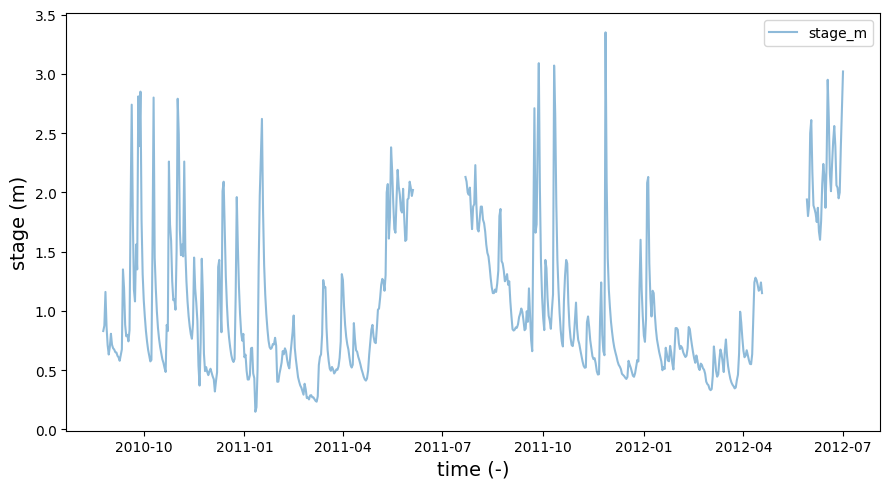

In [60]:
f,ax = plt.subplots(1,figsize=(9,5))

ax.plot(df['stage_m'],label='stage_m',alpha=0.5)
ax.set_xlabel('time (-)',size=14)
ax.set_ylabel('stage (m)',size=14)
ax.legend(loc=0)

f.tight_layout()
plt.show()

Die fehlenden Punkte können herausgefiltert werden, indem wir nach allen Zeilen filtern, in denen der Wert `NaN` vorkommt, was für **keine Zahl** steht.

In [61]:
gaps = df[df['stage_m'].isnull()]

gaps

,ID,PARAM,Date,year,month,day,Value,stage_m
Date,,,,,,,,
2011-06-05,00XX000,2,2011/06/05,2011,6,5,NaN,NaN
2011-06-06,00XX000,2,2011/06/06,2011,6,6,NaN,NaN
2011-06-07,00XX000,2,2011/06/07,2011,6,7,NaN,NaN
2011-06-08,00XX000,2,2011/06/08,2011,6,8,NaN,NaN
2011-06-09,00XX000,2,2011/06/09,2011,6,9,NaN,NaN
...,...,...,...,...,...,...,...,...
2012-05-24,00XX000,2,2012/05/24,2012,5,24,NaN,NaN
2012-05-25,00XX000,2,2012/05/25,2012,5,25,NaN,NaN
2012-05-26,00XX000,2,2012/05/26,2012,5,26,NaN,NaN


In [62]:
print(len(gaps))

87


Die Funktion `len` sagt uns, wie viele Zeilen ein dataframe enthält, in diesem Fall der dataframe, den wir durch Filtern nach allen nicht numerischen Werten (`NaN`) im Originaldatensatz erstellt haben. Interpretiert wird dies so, dass 87 Tage an Daten fehlen.

Wenn bekannt ist, dass in Zukunft mit mehr Dateien dieser Datenquelle gearbeitet werden soll (bspw. neu installierter Sensors), könnte damit begonnen werden, die offensichtlich fehlerhafte Datenaufzeichnung am Sensor selber zu beheben. Alternativ könnten die Daten über sinnvolle Weise ersetzt werden, bspw. durch lineare Interpolation:

In [63]:
df['stage_m'].interpolate(method='linear', inplace=True)

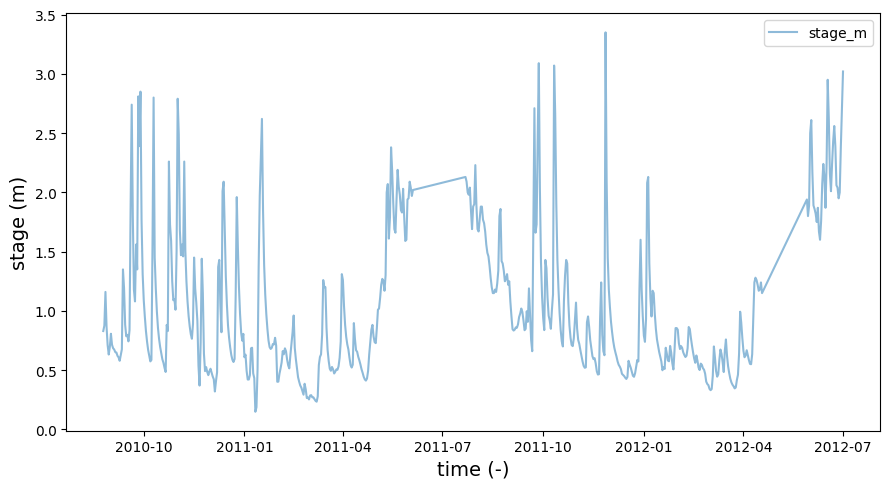

In [64]:
f,ax = plt.subplots(1,figsize=(9,5))

ax.plot(df['stage_m'],label='stage_m',alpha=0.5)
ax.set_xlabel('time (-)',size=14)
ax.set_ylabel('stage (m)',size=14)
ax.legend(loc=0)

f.tight_layout()
plt.show()

Dies mag wie viel Arbeit für wenig Wert erscheinen. 

Allerdings ist die Möglichkeit, Daten schnell programmgesteuert zu überprüfen immer wichtiger, da die Datensätze der Welt auch immer größer werden. Es wird zukünftig nicht mehr möglich sein visuell durch 1 Millionen Zeilen einer Text oder Excel-Datei zu scrollen. 

![Github-Downloadseite](img/worth_it.gif)
(Quelle: [Giphy.com](https://giphy.com))